In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS111/Do an/final_data.csv')

In [5]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# 1. Số lượng, xu hướng thay đổi của thảm họa

Biểu đồ cột Số lượng thảm họa theo thập kỷ

In [6]:
# chuẩn bị dữ liệu
df['Decade'] = (df['Start Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()
print(decade_counts)

Decade
1950      2
1960      5
1970      8
1980     28
1990     69
2000    108
2010     80
2020     35
Name: count, dtype: int64


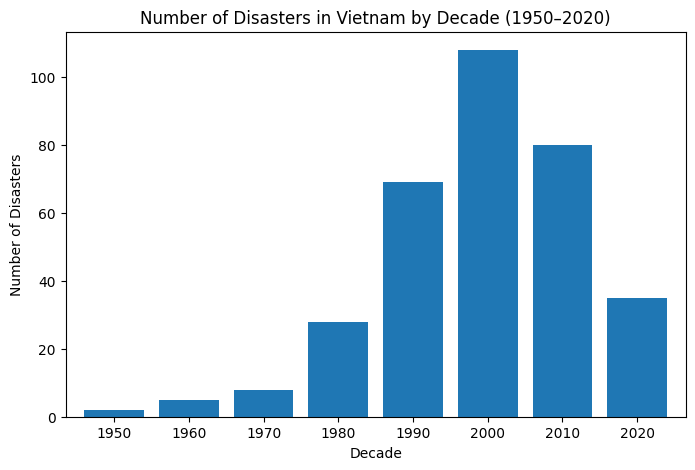

In [7]:
# vẽ biểu đồ cột thể hiện số lượng
plt.figure(figsize=(8, 5))
decade_counts.plot(kind='bar', width=0.8)
plt.xlabel('Decade')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters in Vietnam by Decade (1950–2020)')
plt.xticks(rotation=0)
plt.show()

Biểu đồ đường Số lượng thảm họa theo năm

In [8]:
year_counts = df['Start Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Number_of_Disasters']
print(year_counts)

    Year  Number_of_Disasters
0   1953                    1
1   1956                    1
2   1964                    3
3   1966                    1
4   1967                    1
5   1970                    1
6   1971                    2
7   1973                    1
8   1975                    1
9   1977                    1
10  1978                    2
11  1980                    3
12  1981                    1
13  1982                    1
14  1983                    3
15  1984                    3
16  1985                    2
17  1986                    2
18  1987                    3
19  1988                    3
20  1989                    7
21  1990                    5
22  1991                    9
23  1992                    7
24  1993                    7
25  1994                    3
26  1995                    4
27  1996                    8
28  1997                    7
29  1998                    8
30  1999                   11
31  2000                   12
32  2001  

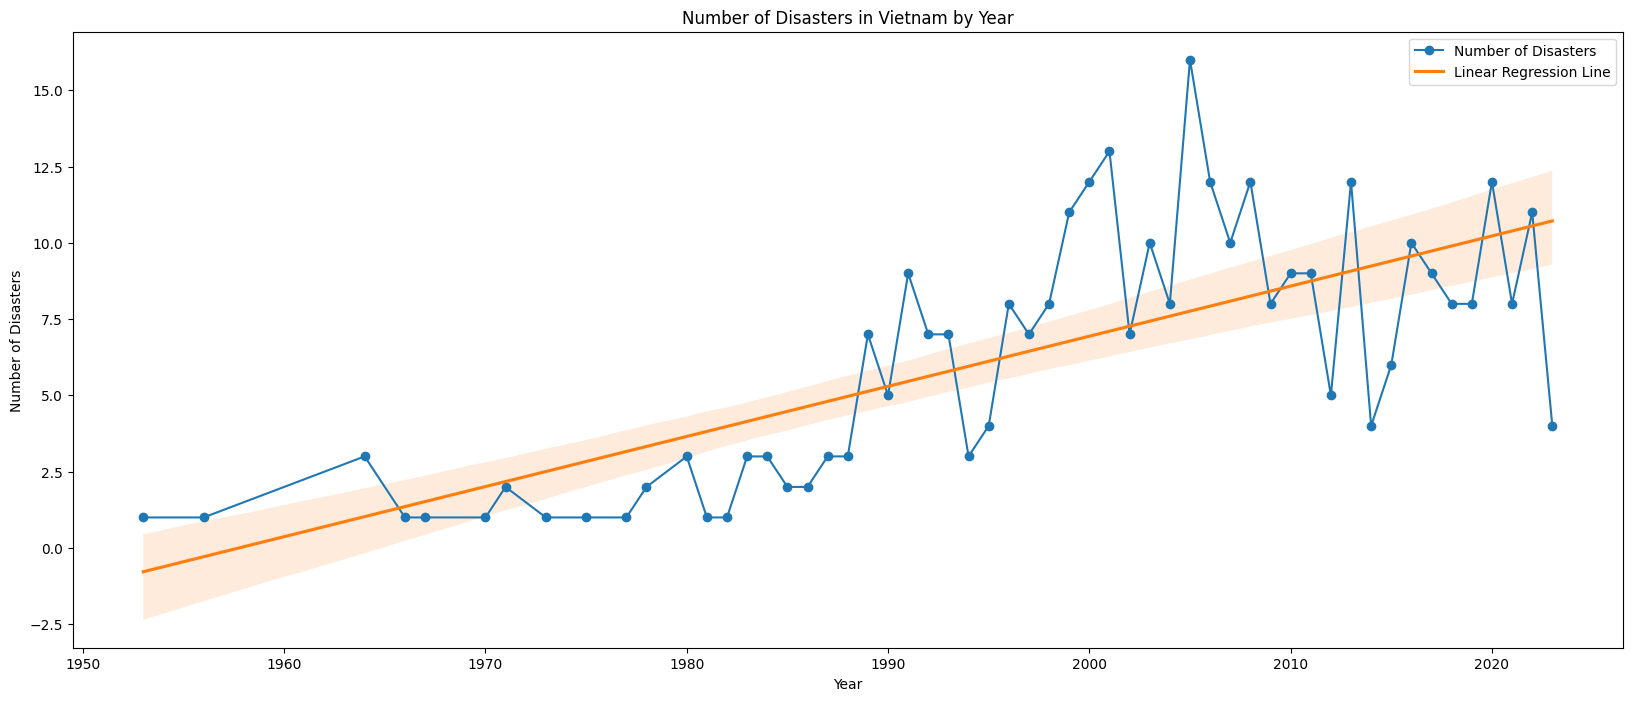

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(year_counts['Year'],year_counts['Number_of_Disasters'],marker='o',label='Number of Disasters')
sns.regplot(data=year_counts,x='Year',y='Number_of_Disasters',scatter=False,label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters in Vietnam by Year')
plt.legend()
plt.show()

# 2. Loại thảm họa

Số lượng thảm họa

In [10]:
subtype_counts = df['Disaster Type'].value_counts().sort_values(ascending=False)
print(subtype_counts)

Disaster Type
Storm                               133
Flood                               103
Road                                 20
Water                                19
Epidemic                             10
Drought                               7
Fire (Miscellaneous)                  6
Air                                   6
Collapse (Industrial)                 6
Mass movement (wet)                   6
Explosion (Industrial)                5
Explosion (Miscellaneous)             3
Miscellaneous accident (General)      2
Poisoning                             2
Fire (Industrial)                     2
Rail                                  2
Infestation                           1
Collapse (Miscellaneous)              1
Wildfire                              1
Name: count, dtype: int64


Biểu đồ cột thể hiện số lượng thảm họa theo loại thảm họa (1953 - 2024)

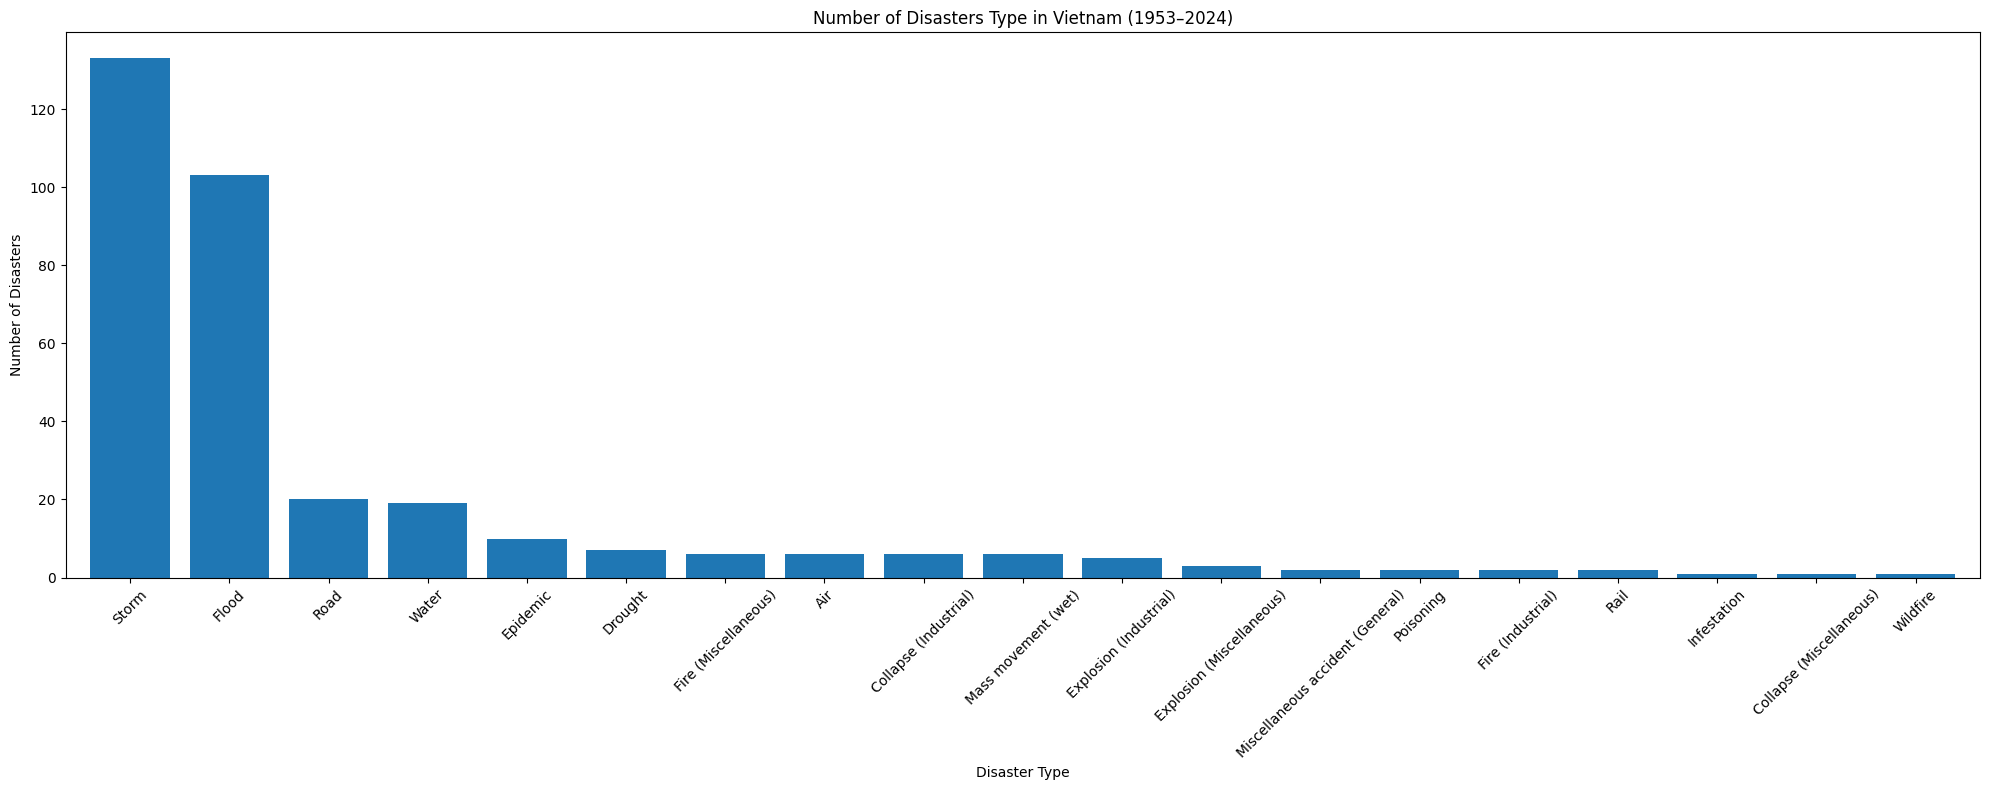

In [11]:
plt.figure(figsize=(20, 8))
subtype_counts.plot(kind='bar', width=0.8)
plt.xlabel('Disaster Type')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters Type in Vietnam (1953–2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Bão và lũ là loại thảm họa có số lượng nhiều nhất

Xu hướng thay đổi của các loại thảm họa

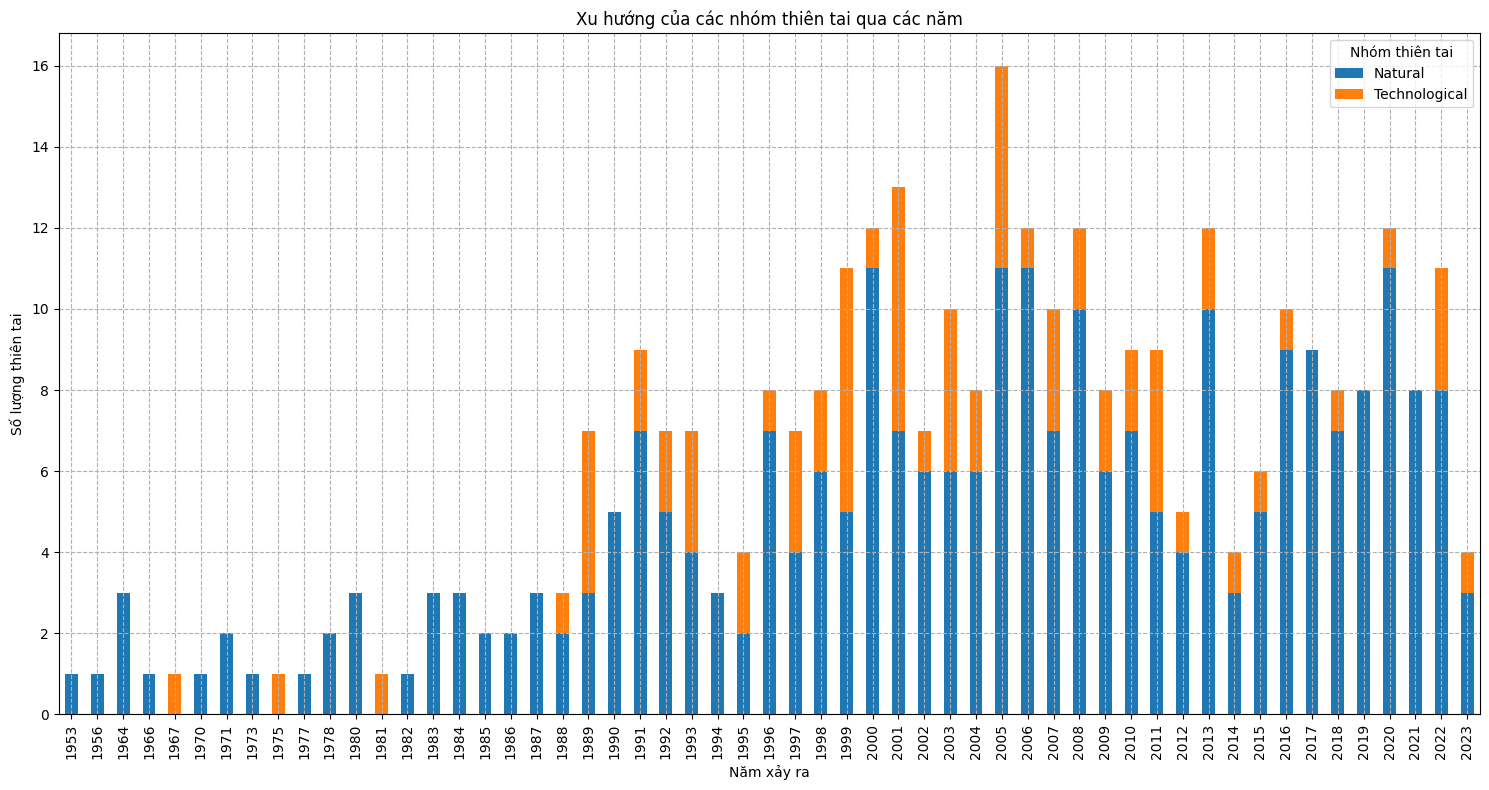

In [12]:
disaster_group_yearly_counts = df.groupby(['Start Year', 'Disaster Group']).size().unstack(fill_value=0)

disaster_group_yearly_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Xu hướng của các nhóm thiên tai qua các năm')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai')
plt.legend(title='Nhóm thiên tai')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

> Trong 5 năm gần nhất, các thiên xảy ra đa số đều là các loại thiên tai liên quan tới tự nhiên, chỉ có một số ít các loại thảm họa liên quan đến công nghệ/hạ tầng

Nhóm thảm họa Technological

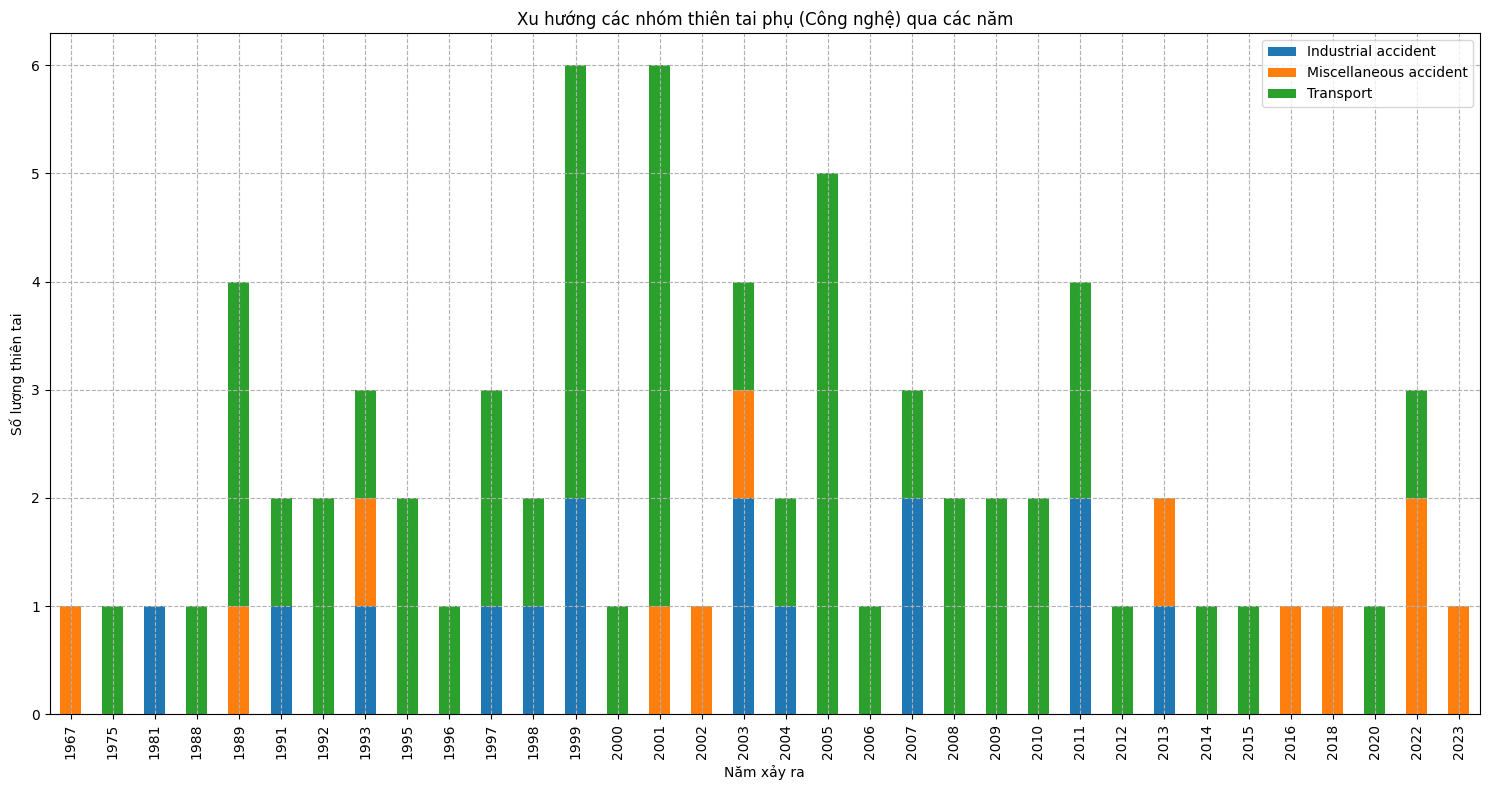

In [13]:
df_technological = df[df['Disaster Group'] == 'Technological'].copy()
disaster_subgroup_technological_yearly_counts = df_technological.groupby(['Start Year', 'Disaster Subgroup']).size().unstack(fill_value=0)

disaster_subgroup_technological_yearly_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Xu hướng các nhóm thiên tai phụ (Công nghệ) qua các năm')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

> * Trong các năm gần đây thì các loại thảm hoạ thuộc loại tai nạn công nghiệp (Industrial accient) gần như đã biến mất. Các loại thảm hoạt thuộc nhóm công nghệ/hạ tầng (Technological) chủ yếu là do giao thông vận tải hoặc các loại thiên tai thuộc nhóm khác (miscellaneous accident)- đây là nhóm các loại thiên tai không rõ ràng như sập các công trình dân dụng, các sự cố bất thường, các tai nạn quy mô lớn không phân loại được.


Nhảm thảm họa Natural

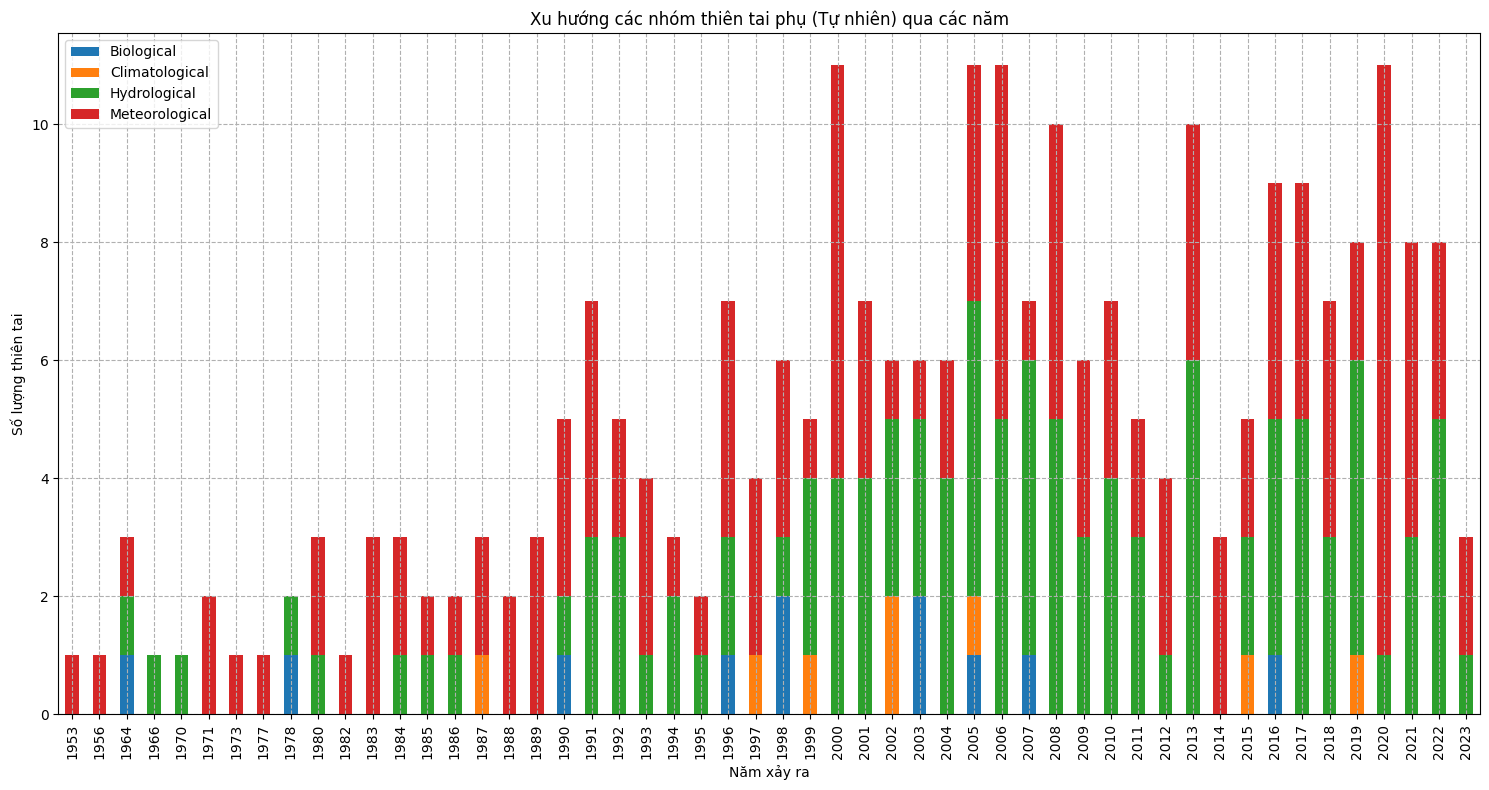

In [14]:
df_technological = df[df['Disaster Group'] == 'Natural'].copy()
disaster_subgroup_technological_yearly_counts = df_technological.groupby(['Start Year', 'Disaster Subgroup']).size().unstack(fill_value=0)

disaster_subgroup_technological_yearly_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Xu hướng các nhóm thiên tai phụ (Tự nhiên) qua các năm')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

> * Các loại thiên tai liên quan đến tự nhiên chiếm phần lớn trong tổng số lượng các loại thiên tai xảy ra ở Việt Nam. Trong đó các loại thiên tai liên quan đến thủy văn(hydrological) và khí tượng(meteological) chiếm số lượng lớn

Kiểm tra các loại thiên tai thuộc 2 nhóm thủy văn(hydrological) và khí tượng (meteological)



In [15]:
disaster_of_hydrological = df[df['Disaster Subgroup'] == 'Hydrological']
disaster_of_meteorological = df[df['Disaster Subgroup'] == 'Meteorological']
print('Thủy văn: ', disaster_of_hydrological['Disaster Type'].unique())
print('Khí tượng: ', disaster_of_meteorological['Disaster Type'].unique())

Thủy văn:  ['Flood' 'Mass movement (wet)']
Khí tượng:  ['Storm']


Trực quan hóa số lượng các loại thiên tai liên quan đến tự nhiên xảy ra ở Việt Nam

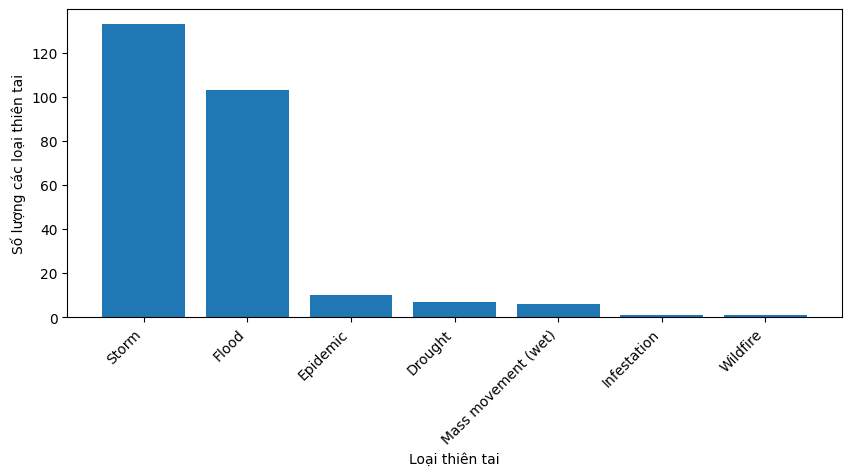

In [16]:
count_natural_disaster_type = df[df['Disaster Group'] == 'Natural']['Disaster Type'].value_counts()
plt.figure(figsize=(10, 4))
plt.bar(count_natural_disaster_type.index, count_natural_disaster_type.values)
plt.xlabel('Loại thiên tai')
plt.ylabel('Số lượng các loại thiên tai')
plt.xticks(rotation=45, ha='right')
plt.show()

> Dựa vào các biểu đồ ta có thể thấy loại thiên tai 'Storm' thuộc nhóm phụ 'meteorological' và 'Flood' thuộc nhóm phụ 'hydrological' của nhóm thảm họa tự nhiên (natural) chiếm số lượng lớn các loại thảm họa ở Việt Nam

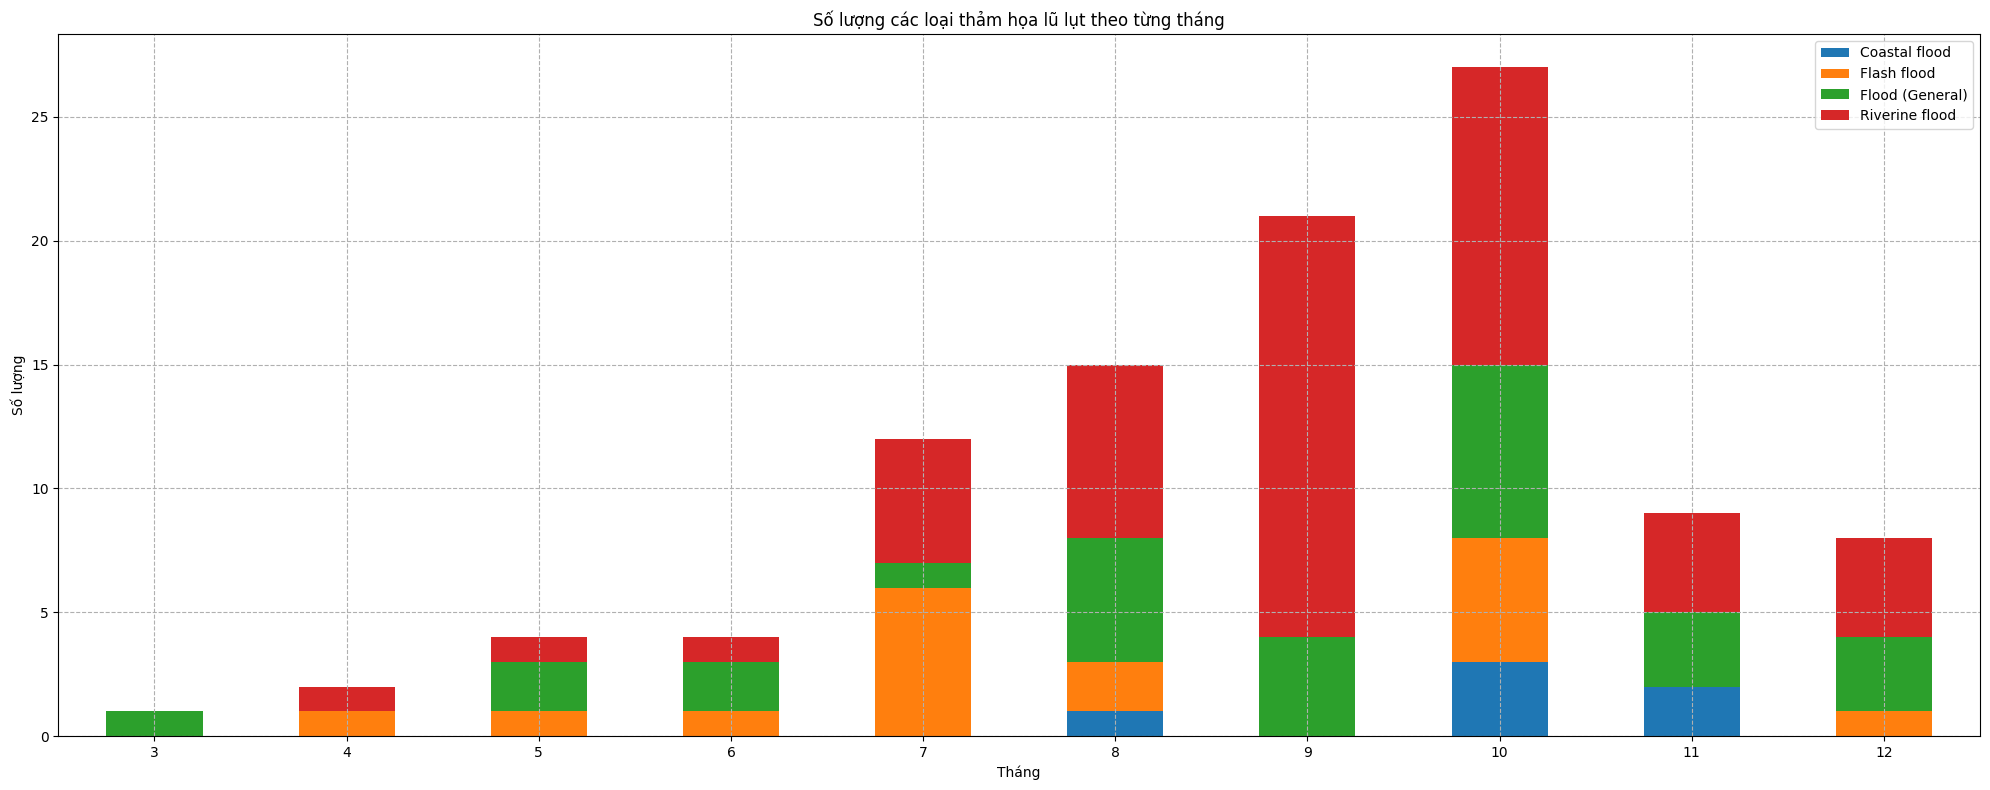

In [17]:
df_flood = df.dropna(subset=['Start Month'])
df_flood = df_flood[df_flood['Disaster Type'] == 'Flood']
df_flood['Start Month'] = df_flood['Start Month'].astype(int)
flood_subtypes_yearly_counts = df_flood.groupby(['Start Month', 'Disaster Subtype']).size().unstack(fill_value=0)

flood_subtypes_yearly_counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Số lượng các loại thảm họa lũ lụt theo từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


> * Các loại thiên tai liên quan đến bão lũ thường bắt đầu vào tháng 3,4,5 hằng năm.  

Phân tích loại thiên tai Storm

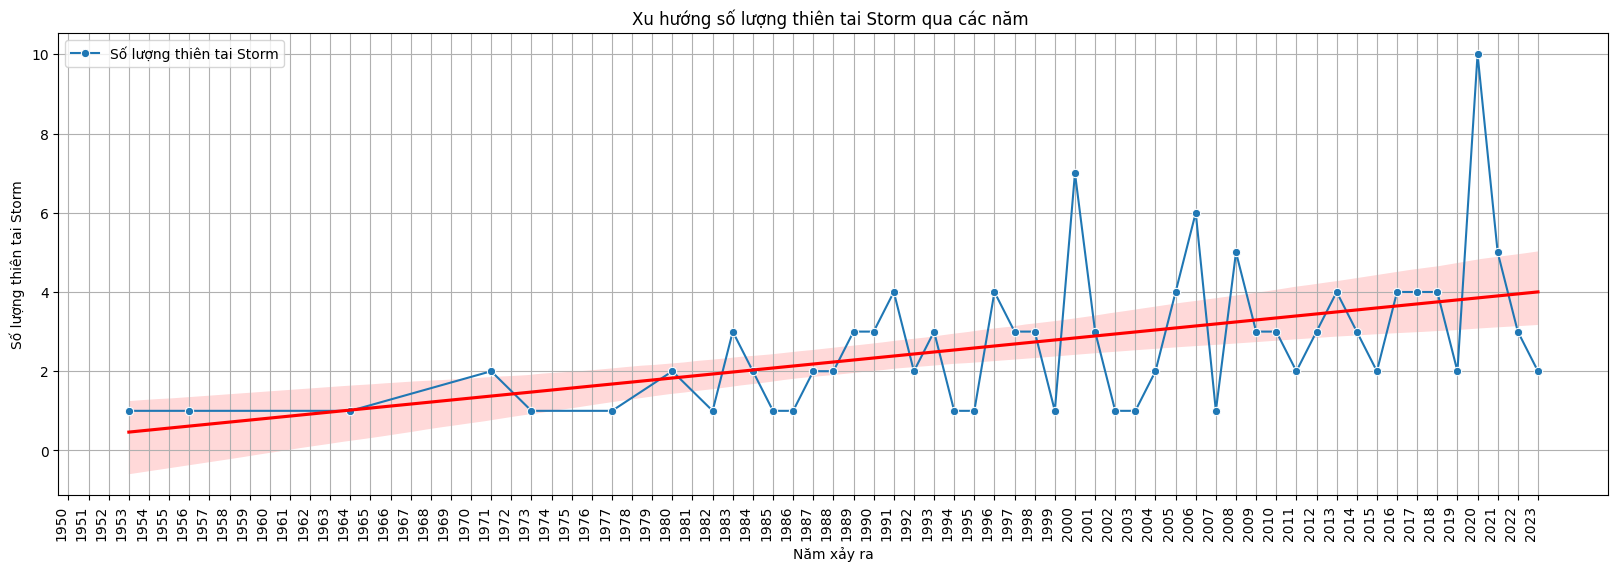

In [18]:
df_storm = df[df['Disaster Type'] == 'Storm']
storm_yearly_counts = df_storm.groupby('Start Year').size().reset_index(name='Count')

plt.figure(figsize=(20, 6))
sns.lineplot(x='Start Year', y='Count', data=storm_yearly_counts, marker='o', label='Số lượng thiên tai Storm')
sns.regplot(x='Start Year', y='Count', data=storm_yearly_counts, scatter=False, color='red', label='Đường hồi quy')
plt.title('Xu hướng số lượng thiên tai Storm qua các năm ')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai Storm')
plt.xticks(ticks=np.arange(1950, 2024), labels=[str(i) for i in range(1950, 2024)],rotation=90, ha='right')
plt.grid()
plt.show()

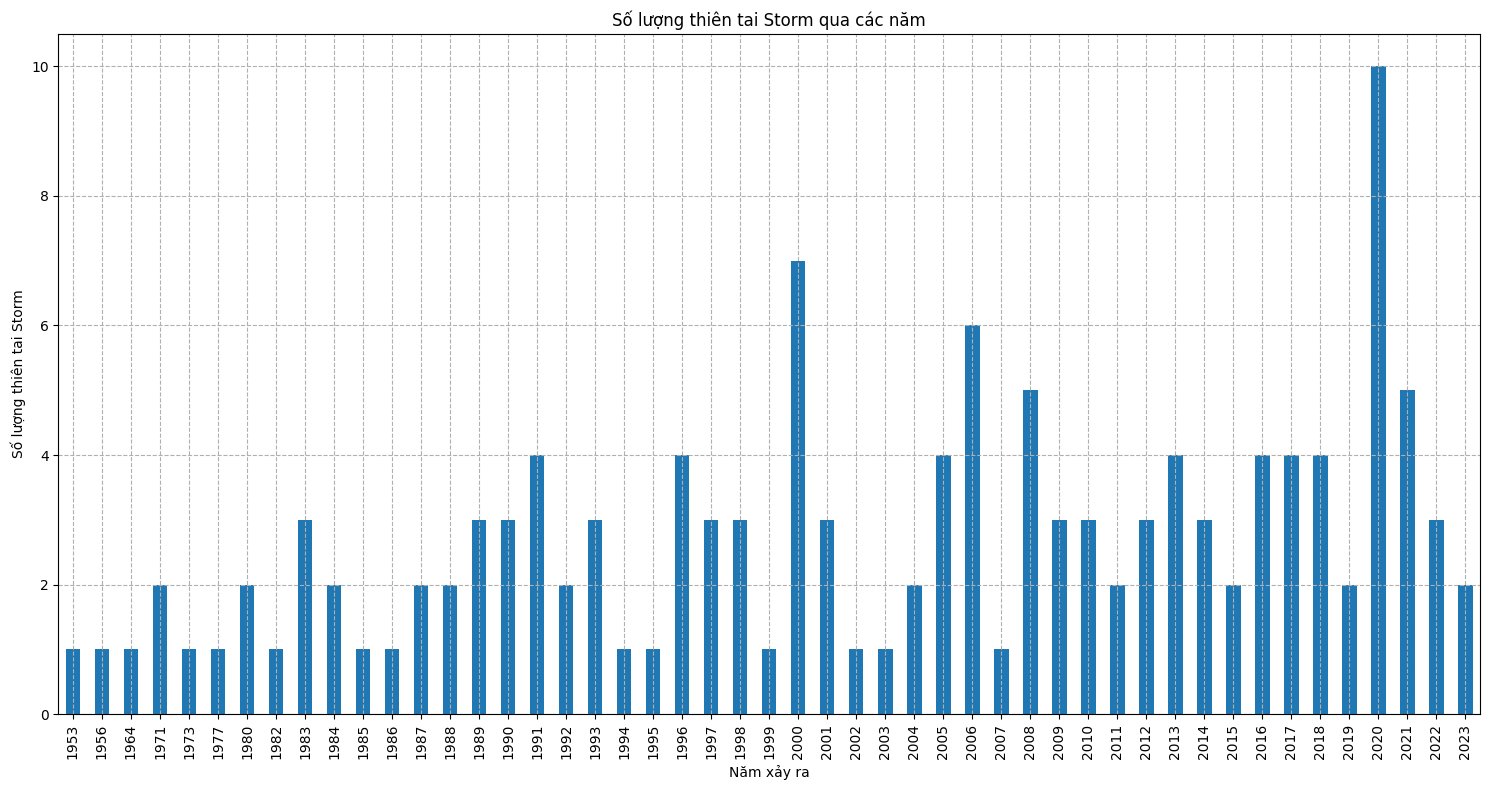

In [19]:
df_storm = df[df['Disaster Type'] == 'Storm']
storm_yearly_counts = df_storm.groupby('Start Year').size()

plt.figure(figsize=(15, 8))
storm_yearly_counts.plot(kind='bar')
plt.title('Số lượng thiên tai Storm qua các năm')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai Storm')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

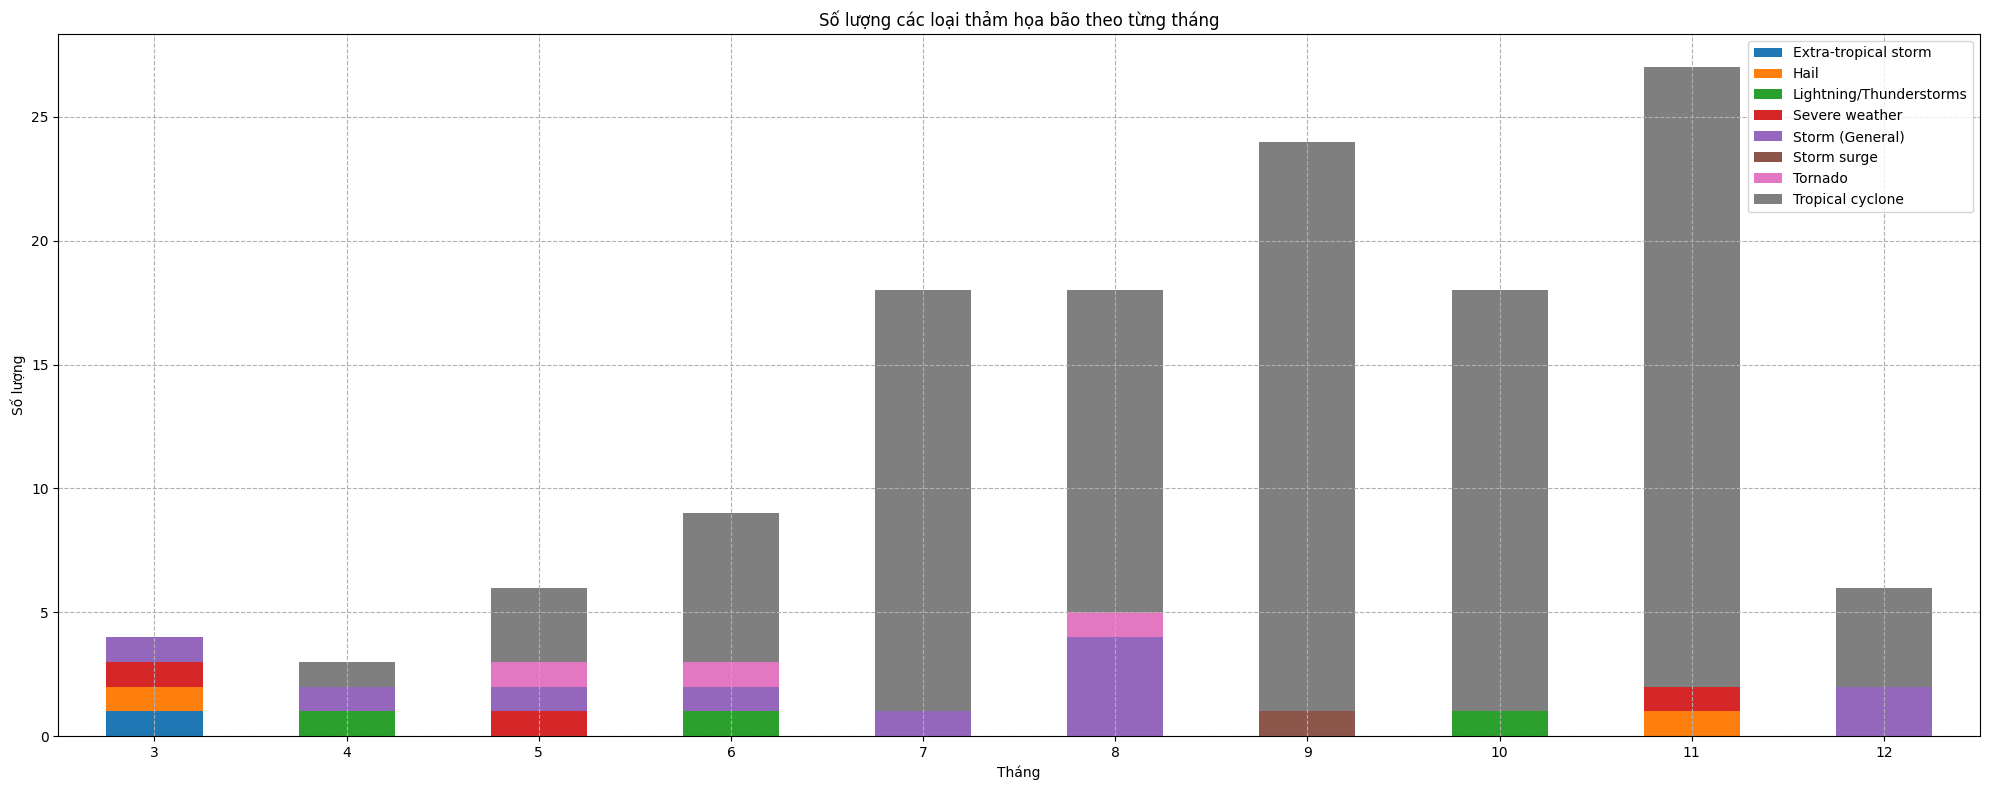

In [20]:
df_storm = df.dropna(subset=['Start Month'])
df_storm = df_storm[df_storm['Disaster Type'] == 'Storm']
df_storm['Start Month'] = df_storm['Start Month'].astype(int)
storm_subtypes_yearly_counts = df_storm.groupby(['Start Month', 'Disaster Subtype']).size().unstack(fill_value=0)

storm_subtypes_yearly_counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Số lượng các loại thảm họa bão theo từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

> * Các cơn bão xuất hiện chủ yếu là bão nhiệt đới(tropical cyclone)

Phân tích loại thiên tai flood

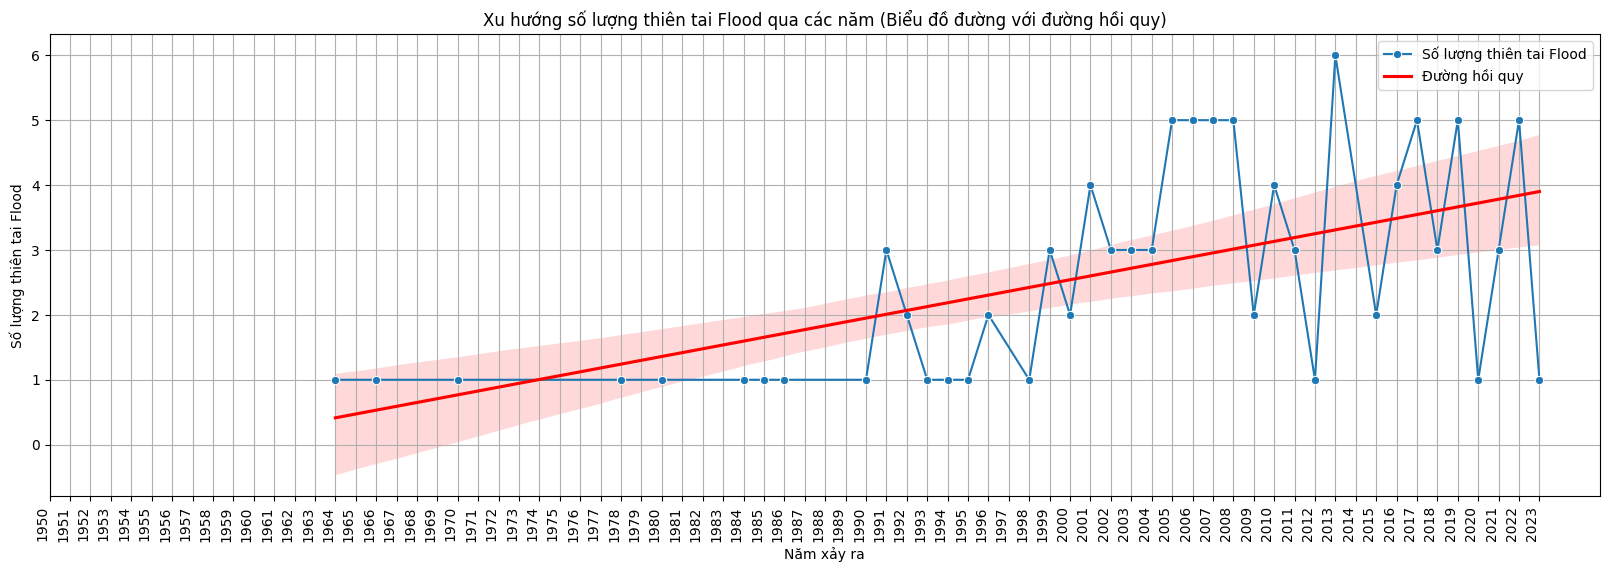

In [21]:
df_flood = df[df['Disaster Type'] == 'Flood']
flood_yearly_counts = df_flood.groupby('Start Year').size().reset_index(name='Count')

plt.figure(figsize=(20, 6))
sns.lineplot(x='Start Year', y='Count', data=flood_yearly_counts, marker='o', label='Số lượng thiên tai Flood')
sns.regplot(x='Start Year', y='Count', data=flood_yearly_counts, scatter=False, color='red', label='Đường hồi quy')
plt.title('Xu hướng số lượng thiên tai Flood qua các năm (Biểu đồ đường với đường hồi quy)')
plt.xlabel('Năm xảy ra')
plt.ylabel('Số lượng thiên tai Flood')
plt.xticks(ticks=np.arange(1950, 2024), labels=[str(i) for i in range(1950, 2024)],rotation=90, ha='right')
plt.grid()
plt.legend()
plt.show()

> * Từ năm 2013 trờ về trước, các cơn lũ thường chỉ là riverine flood - là loại lũ xảy ra khi mực nước sông dâng cao hoặc do các cơn mưa lớn kéo dài lâu ngày. Thường xảy ra ở đồng bằng hoặc các khu vực ven sông.    
> * Tuy nhiên từ năm 2015, các cơn lũ có xu hướng chuyển biến thành các cơn lũ lớn (flood(General)) hoặc lũ quét (flash flood).

# 3. Thời gian thảm họa trong năm

In [22]:
df_month = df.dropna(subset=['Start Month'])

# Ép kiểu tháng về int
df_month['Start Month'] = df_month['Start Month'].astype(int)

/tmp/ipython-input-3913904679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Start Month'] = df_month['Start Month'].astype(int)


Biểu đồ cột chồng thể hiện tổng số lượng thảm họa theo tháng trong năm (1953 - 2024)

In [23]:
# Đếm số thảm họa theo tháng và loại
month_type_counts = (df_month.groupby(['Start Month', 'Disaster Type']).size().unstack(fill_value=0).sort_index())
month_type_counts

Disaster Type,Air,Collapse (Industrial),Collapse (Miscellaneous),Drought,Epidemic,Explosion (Industrial),Explosion (Miscellaneous),Fire (Industrial),Fire (Miscellaneous),Flood,Infestation,Mass movement (wet),Miscellaneous accident (General),Poisoning,Rail,Road,Storm,Water,Wildfire
Start Month,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,3,3,0,0,0,0,0,0,0,0,0,3,0,3,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,2,4,3,1
4,2,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,3,2,0
5,0,0,0,2,0,0,1,1,0,4,0,0,0,0,0,1,6,1,0
6,0,1,0,0,0,0,1,0,0,4,0,0,1,0,0,2,9,1,0
7,2,0,0,1,2,0,0,1,0,12,0,3,0,1,0,2,18,2,0
8,0,0,0,0,0,0,0,0,0,15,0,0,0,0,1,2,18,2,0
9,0,2,0,0,2,0,0,0,2,21,1,1,1,0,0,2,24,0,0


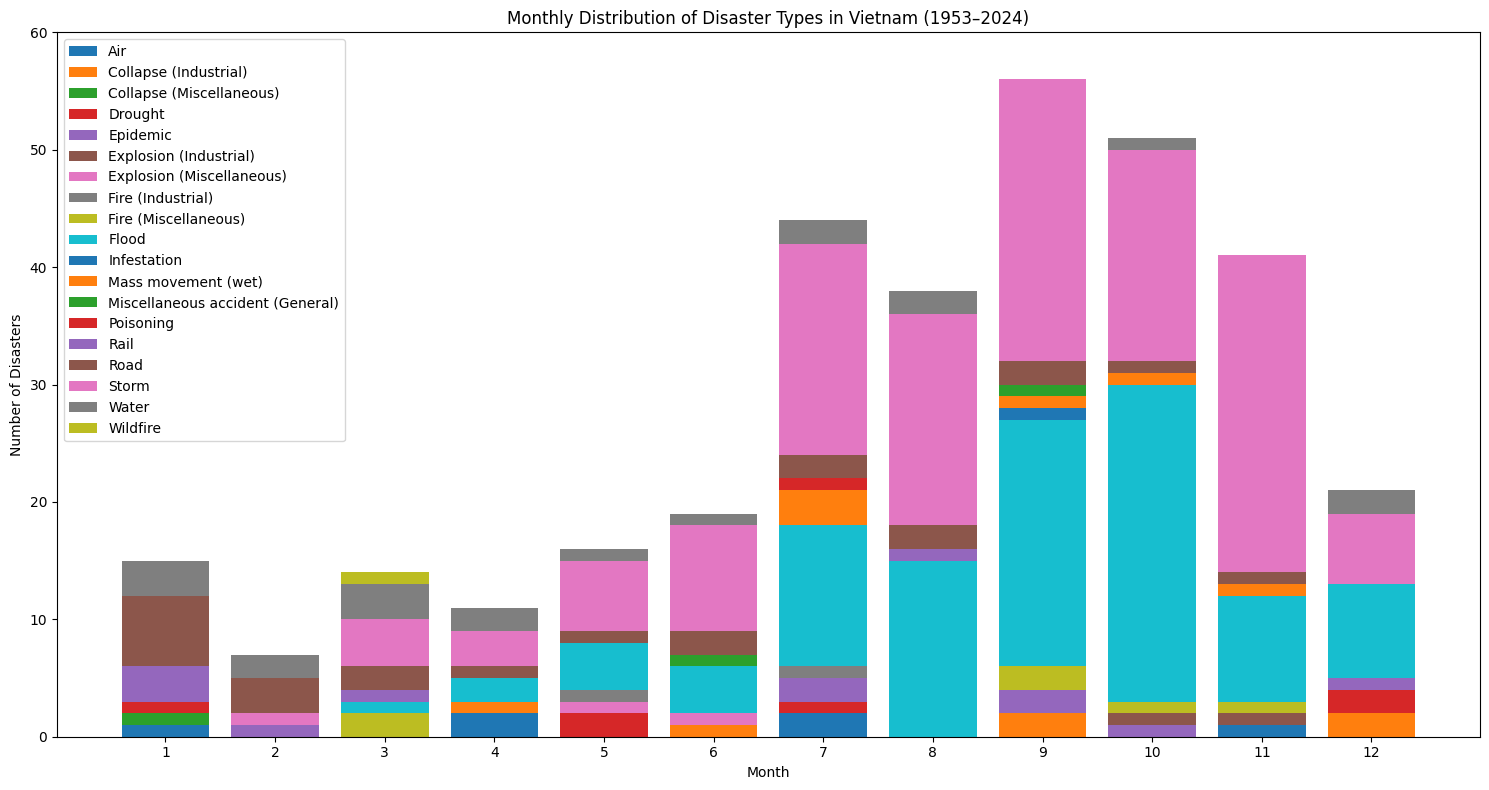

In [24]:
plt.figure(figsize=(15, 8))

bottom = np.zeros(len(month_type_counts))

for disaster_type in month_type_counts.columns:
    values = month_type_counts[disaster_type].values
    plt.bar(month_type_counts.index,values,bottom=bottom,label=disaster_type)
    bottom += values

plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.title('Monthly Distribution of Disaster Types in Vietnam (1953–2024)')
plt.xticks(range(1, 13))
plt.ylim(ymax=60)
plt.legend()
plt.tight_layout()
plt.show()


> Thảm họa tập trung nhiều ở các tháng nửa sau trong năm, đặc biệt là thiên tai Bão và Lũ, nhiều vào mmùa mưa và ít vào mùa khô

# 4. Vùng thảm họa

In [25]:
def to_list(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('[') and x.endswith(']'):
            x = x[1:-1]
            return [
                item.strip().strip("'\"")
                for item in x.split(',')
                if item.strip()
            ]
        return [x]
    return [x]


In [26]:
df['economic_region'] = df['economic_region'].apply(to_list)

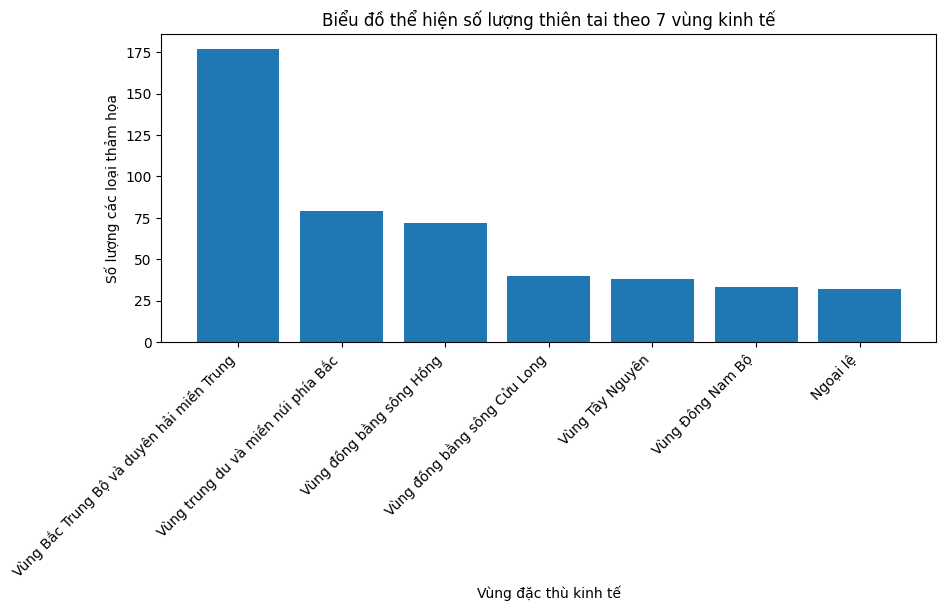

In [27]:
df1 = df.explode('economic_region')
count_disaster_region = df1['economic_region'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(count_disaster_region.index, count_disaster_region.values)
plt.xlabel('Vùng đặc thù kinh tế')
plt.ylabel('Số lượng các loại thảm họa')
plt.xticks(rotation=45, ha='right')
plt.title('Biểu đồ thể hiện số lượng thiên tai theo 7 vùng kinh tế')
plt.show()

> Vùng Bắc Trung Bộ và duyên hải miền Trung là nơi thu hút nhiều thiên tai nhất cả nước với hơn 175 vụ thiên tai

# 5. Thời gian tác động của thảm họa

In [28]:
df['Duration'] = df['End Date'] - df['Start Date']
df[df['Duration'].dt.days > 5]

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location,Origin,Associated Types,OFDA Response,Appeal,AID Contribution ('000 US$),...,"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,economic_region,Start Date,End Date,Decade,Duration
43,Natural,Hydrological,Flood,Riverine flood,"Son La, Hoang Lien Son, Ha Tuyen, Binh Dinh, D...",Heavy rain,No,No,No,NaN,...,1624.0,44.645877,NaN,2006-07-19,2023-09-25,"[Vùng Bắc Trung Bộ và duyên hải miền Trung, Vù...",1990-06-20,1990-07-08,1990,18 days
53,Natural,Hydrological,Flood,Riverine flood,"An Giang, Dong Thap, Long An, Tien Giang, Kien...",Heavy rain,No,No,No,NaN,...,82731.0,46.536621,NaN,2006-01-08,2023-09-25,[Vùng đồng bằng sông Cửu Long],1991-09-19,1991-09-25,1990,6 days
66,Natural,Hydrological,Flood,Flash flood,"Phu Yen, Lam Dong, Quang Tri, Da Nang, Khanh H...",Brief torrential rain,No,No,No,NaN,...,20259.0,49.361332,NaN,2005-11-18,2023-09-25,"[Vùng Bắc Trung Bộ và duyên hải miền Trung, Vù...",1993-10-02,1993-10-12,1990,10 days
71,Natural,Hydrological,Mass movement (wet),Mudslide,Lai Chau province,Unknow,"Slide (land, mud, snow, rock)",No,No,NaN,...,4541.0,50.648403,NaN,2006-07-12,2023-09-25,[Vùng trung du và miền núi phía Bắc],1994-07-15,1994-07-31,1990,16 days
72,Natural,Hydrological,Flood,Riverine flood,"Dong Thap, An Giang, Long An, Tien Giang, Kien...",Monsoonal rain,No,Yes,No,920.0,...,406726.0,50.648403,NaN,2006-07-12,2023-09-25,"[Vùng Bắc Trung Bộ và duyên hải miền Trung, Vù...",1994-09-04,1994-12-18,1990,105 days
74,Natural,Hydrological,Flood,Riverine flood,"Quang Binh, Quang Tri, Kegalle, Da Nang, Dong ...",Heavy rain,No,Yes,No,NaN,...,165165.0,52.069299,NaN,2006-07-11,2023-09-25,"[Ngoại lệ, Vùng Bắc Trung Bộ và duyên hải miền...",1995-09-21,1995-10-19,1990,28 days
82,Natural,Hydrological,Flood,Riverine flood,"An Giang, Dong Thap, Tay Minh, Long An, Tien G...",Heavy rain,No,Yes,No,NaN,...,257484.0,53.595561,NaN,2007-08-27,2023-09-25,"[Vùng Đông Nam Bộ, Vùng đồng bằng sông Cửu Long]",1996-10-01,1996-11-13,1990,43 days
85,Natural,Meteorological,Storm,Tropical cyclone,"Thanh Hoa, Golfe du Tonkin",Unknow,"Slide (land, mud, snow, rock)",No,No,NaN,...,423543.0,53.595561,NaN,2007-07-19,2023-09-25,"[Vùng Bắc Trung Bộ và duyên hải miền Trung, Vù...",1996-08-14,1996-08-26,1990,12 days
89,Natural,Meteorological,Storm,Tropical cyclone,"Danang, Quang Ngai, Quang Nam-Da, Nghe An",Unknow,"Flood|Slide (land, mud, snow, rock)",No,No,NaN,...,9116.0,54.848454,NaN,2006-07-10,2023-09-25,[Vùng Bắc Trung Bộ và duyên hải miền Trung],1997-09-20,1997-09-29,1990,9 days
95,Natural,Hydrological,Flood,Riverine flood,"Khan Hoa, Binh Dinh, Quang Ngai, Phu Yen, Ninh...",Heavy rain,No,No,No,NaN,...,24596.0,55.699863,NaN,2005-10-27,2023-09-25,[Vùng Bắc Trung Bộ và duyên hải miền Trung],1998-10-16,1998-10-23,1990,7 days


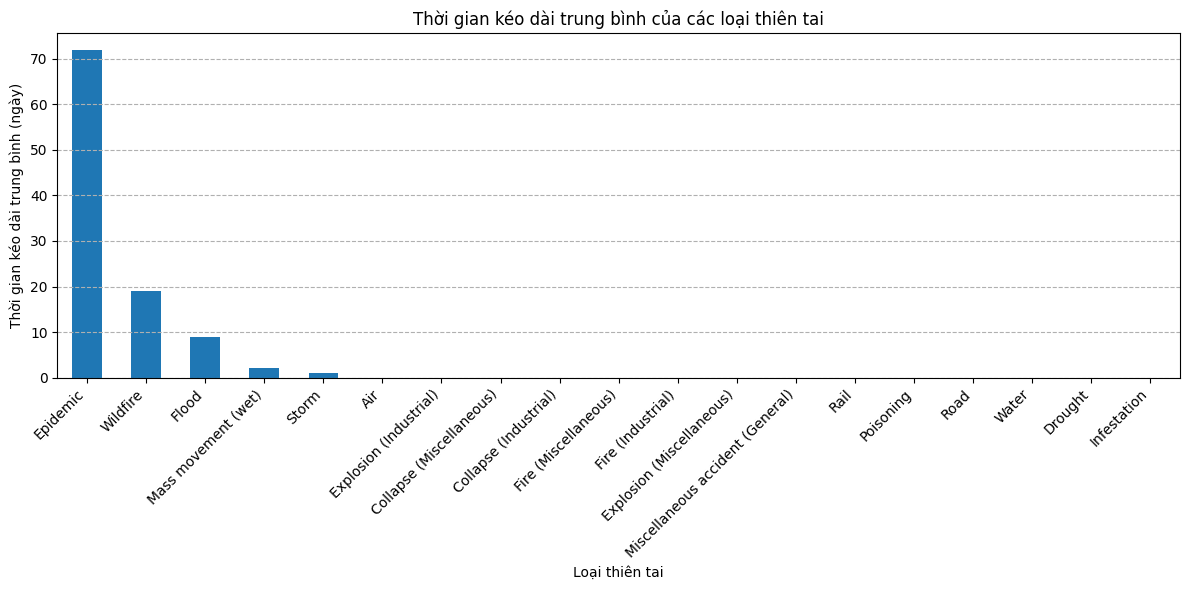

In [29]:
average_duration_by_type = df.groupby('Disaster Type')['Duration'].mean()
average_duration_in_days = average_duration_by_type.dt.days

plt.figure(figsize=(12, 6))
average_duration_in_days.sort_values(ascending=False).plot(kind='bar')
plt.title('Thời gian kéo dài trung bình của các loại thiên tai')
plt.xlabel('Loại thiên tai')
plt.ylabel('Thời gian kéo dài trung bình (ngày)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

* Dịch bệnh (Epidemic): Là loại thiên tai có thời gian kéo dài trung bình cao nhất, lên tới hơn 40 ngày. Điều này hợp lý vì dịch bệnh thường diễn biến phức tạp và kéo dài trong nhiều tuần hoặc nhiều tháng.
* Cháy rừng (Wildfire): Xếp thứ hai về thời gian kéo dài trung bình, khoảng gần 20 ngày. Cháy rừng cũng là loại thiên tai có thể bùng phát và lan rộng trong nhiều ngày liền.
* Lũ lụt (Flood): Có thời gian kéo dài trung bình khoảng dưới 10 ngày. Lũ lụt có thể kéo dài do mực nước dâng cao hoặc dòng chảy chậm.
* Sạt lở (ướt) (Mass movement (wet)) và Bão (Storm): Có thời gian kéo dài trung bình khá ngắn, chỉ vài ngày. Mặc dù bão có thể gây ảnh hưởng trong thời gian ngắn, nhưng hậu quả của nó như lũ lụt có thể kéo dài hơn.  
* Các loại thiên tai khác: Hầu hết các loại thiên tai khác như 'Air', 'Explosion (Industrial)', 'Collapse (Miscellaneous)', 'Fire (Miscellaneous)', 'Rail', 'Poisoning', 'Road', 'Water', 'Drought' có thời gian kéo dài trung bình rất thấp hoặc gần như bằng 0 ngày. Điều này có thể do bản chất của chúng là các sự kiện tức thời hoặc dữ liệu về thời gian kéo dài không đủ để tính toán một cách chính xác.

# 6. Biểu hiện của môi trường trước khi thảm hoạ xảy ra

In [30]:
df_temp = df.copy()
df_temp['Origin'] = df_temp['Origin'].fillna('Unknown')

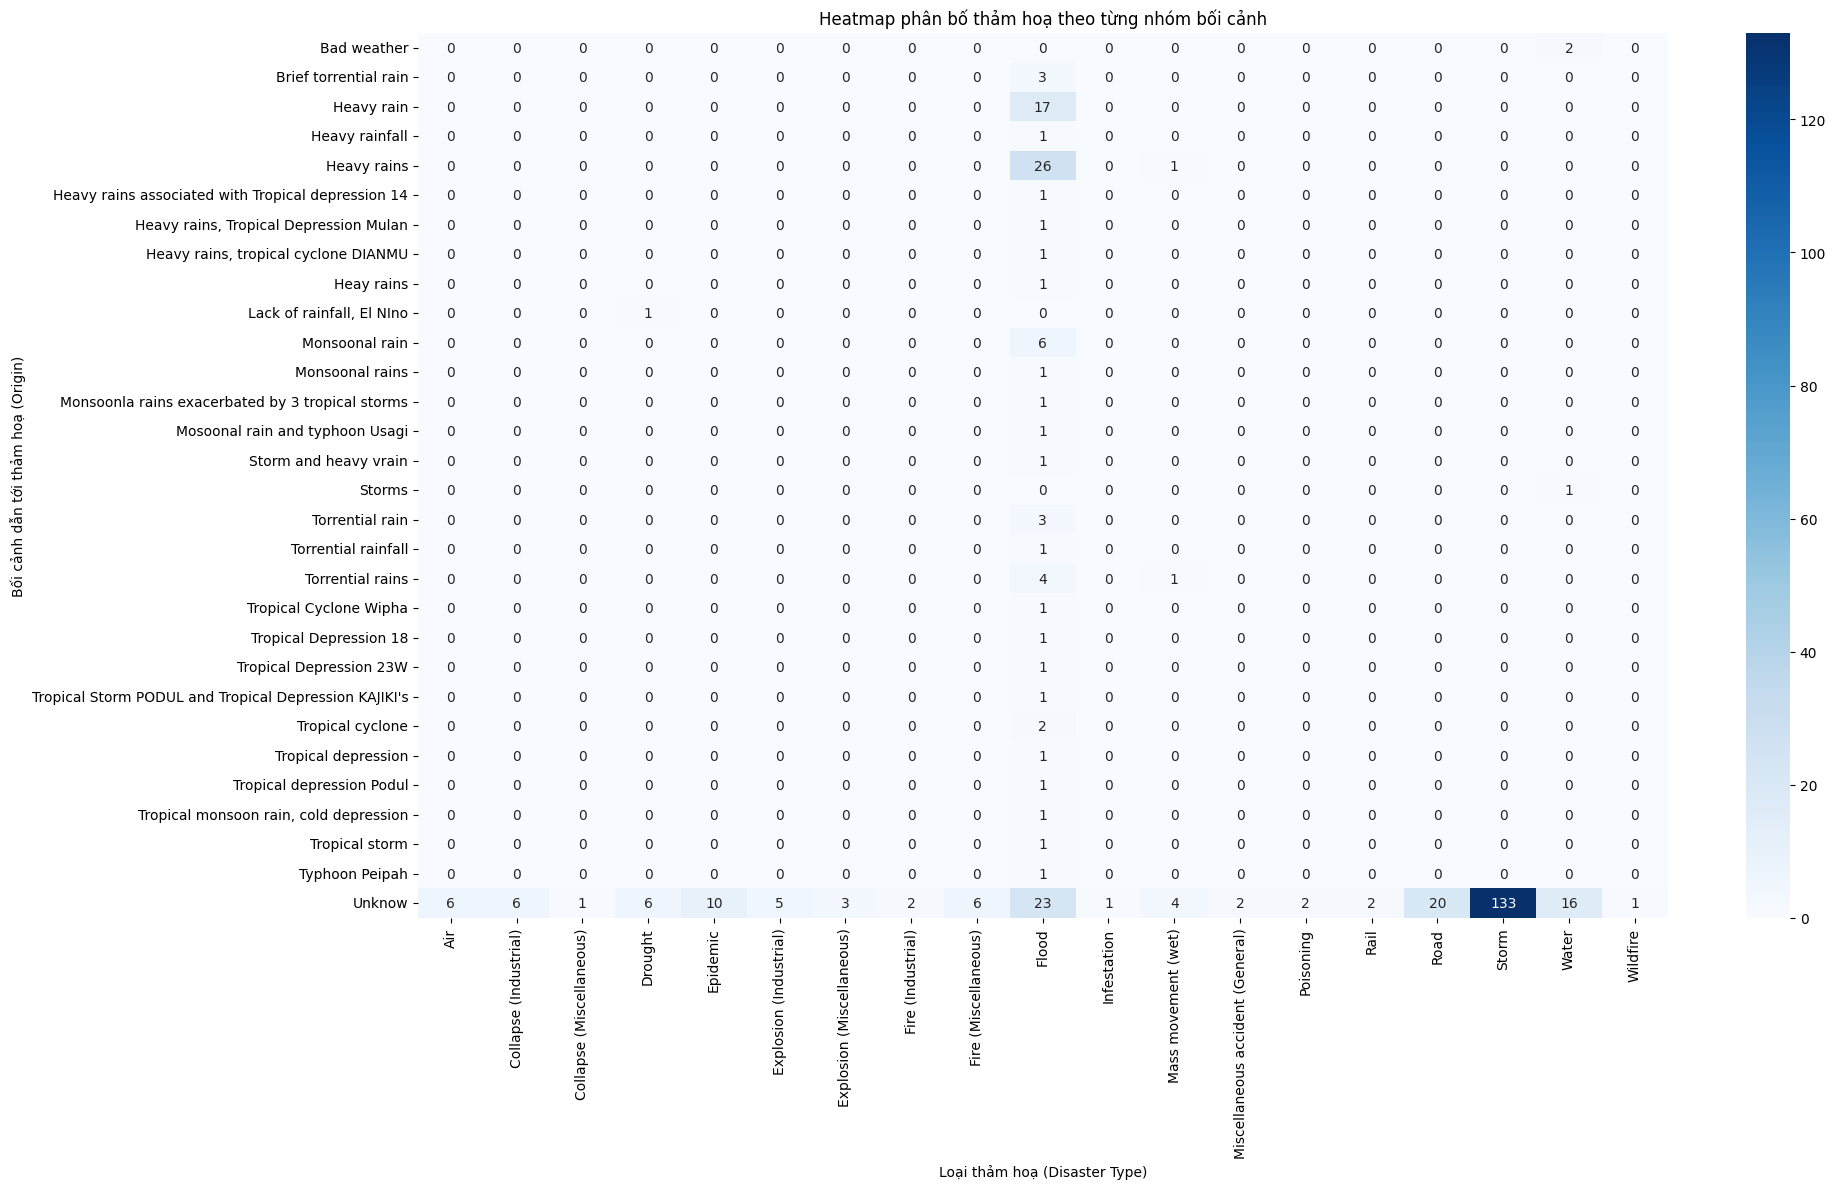

In [31]:
result = pd.crosstab(df_temp['Origin'], df_temp['Disaster Type'])

plt.figure(figsize=(20, 12))
sns.heatmap(result,annot=True,fmt='d',cmap='Blues')
plt.title('Heatmap phân bố thảm hoạ theo từng nhóm bối cảnh')
plt.xlabel('Loại thảm hoạ (Disaster Type)')
plt.ylabel('Bối cảnh dẫn tới thảm hoạ (Origin)')
plt.tight_layout()
plt.show()


> - Lũ lụt ( Flood ) thường xảy ra khi trước đó có mưa giông, áp thấp nhiệt đới dẫn đến mực nước tăng cao và gây ngập lụt
> - Các loại thảm hoạ còn lại hầu như không ghi nhận thông tin về biểu hiện trước khi xảy ra

# 7. Các thảm hoạ kèm theo của các loại thảm hoạ

In [32]:
df_temp = df.copy()
df_temp['Associated Types'] = df_temp['Associated Types'].fillna('No')

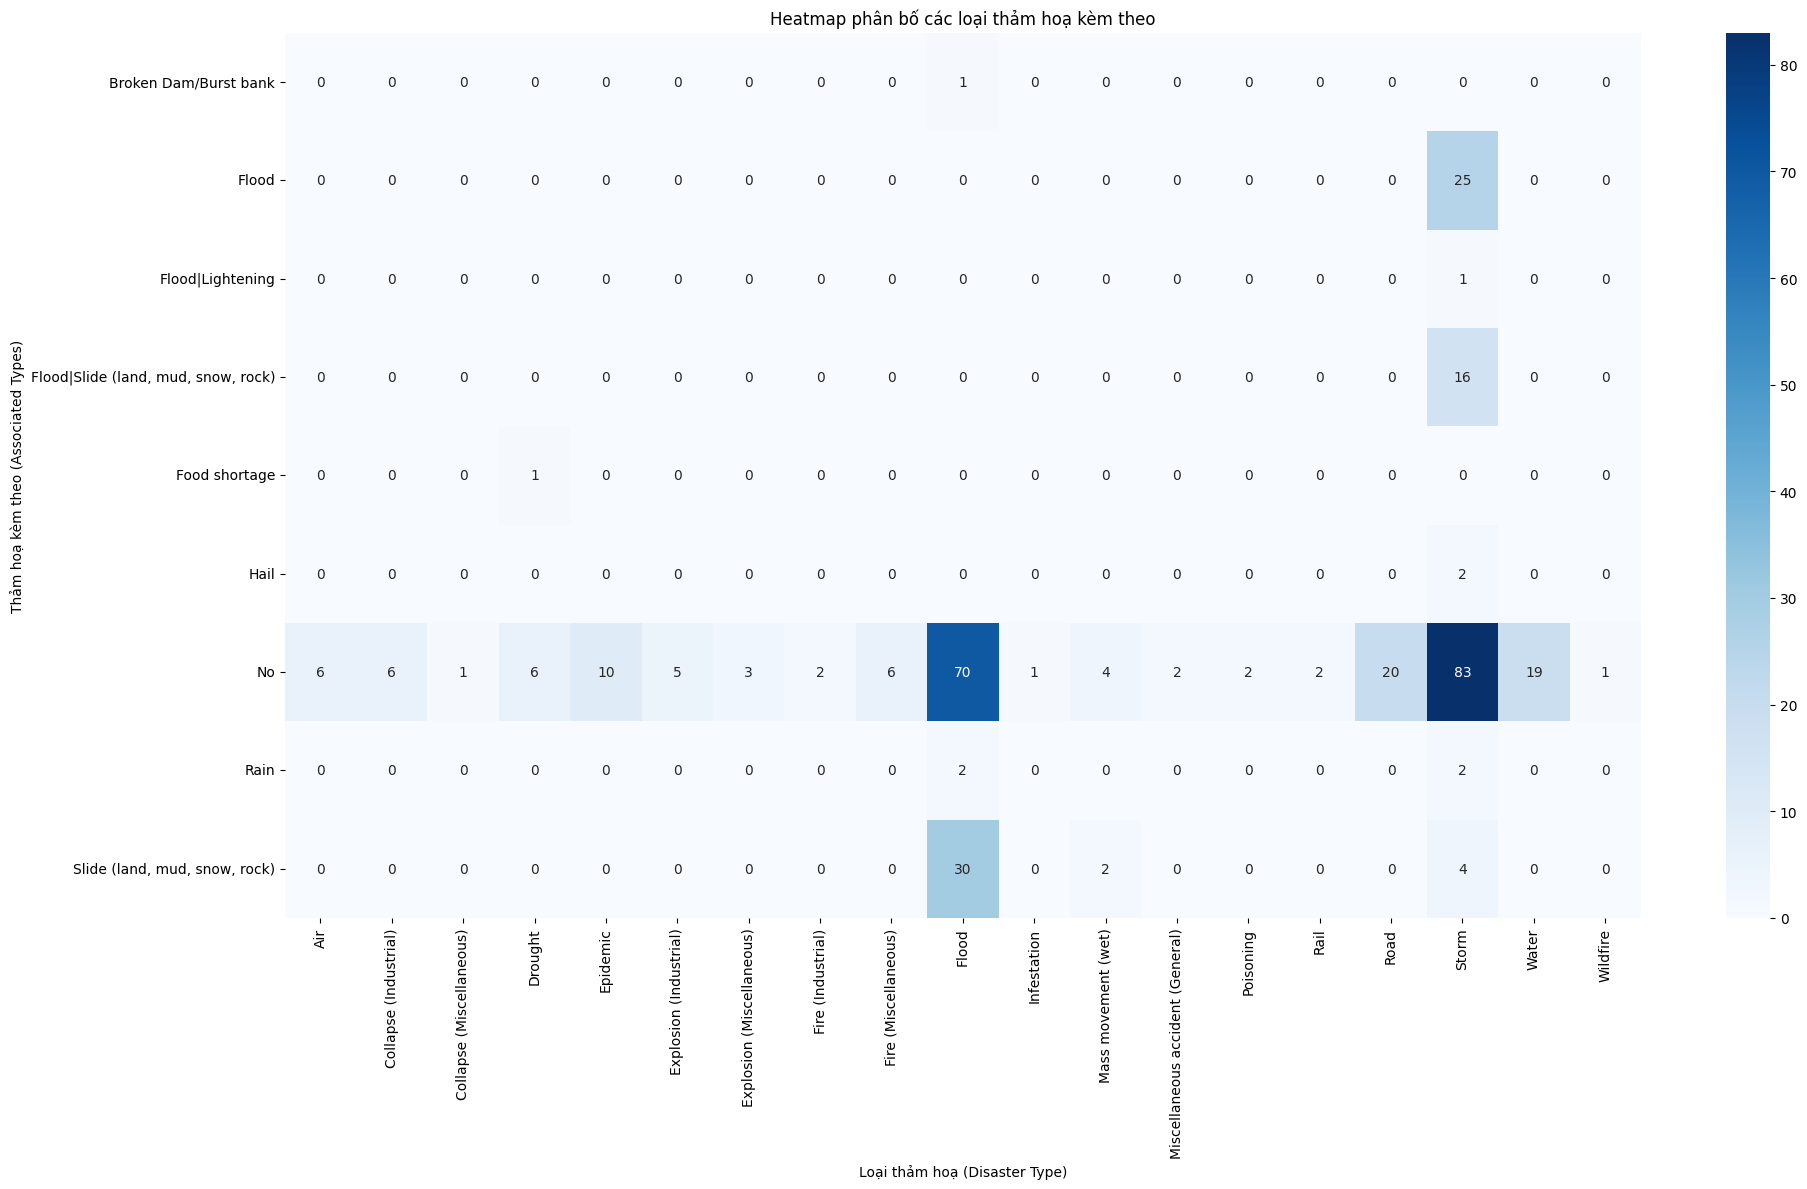

In [33]:
result = pd.crosstab(df_temp['Associated Types'], df_temp['Disaster Type'])

plt.figure(figsize=(20, 12))
sns.heatmap(result,annot=True,fmt='d', cmap='Blues'        )
plt.title('Heatmap phân bố các loại thảm hoạ kèm theo')
plt.xlabel('Loại thảm hoạ (Disaster Type)')
plt.ylabel('Thảm hoạ kèm theo (Associated Types)')
plt.tight_layout()
plt.show()

- Ta có thể thấy phần lớn 2 loại thảm hoạ dẫn đến các thảm hoạ kèm theo là : Bão (Storm) và Lũ lụt (Flood)
- Lũ lụt (Flood) thường dẫn đến sạt lở, trơn trượt, bùn sình ở các nơi có nhiều kênh ngòi, vỡ đê/đập.
- Bão (Storm) thường kéo theo lũ lụt. Điều này là dễ hiểu vì bão lũ sẽ khiến cho mực nước tăng cao gây ngập lụt. Tuy nhiên, điều này chỉ xảy ra ở các vùng có nhiều kênh ngòi, sông
- Các loại thảm hoạ còn lại thì không thấy ghi nhận thông tin về các thảm hoạ kèm theo

# 8. Cường độ thảm hoạ theo thời gian

In [34]:
df_temp = df.dropna(subset=['Start Month']).reset_index(drop=True)
df_temp['Magnitude'] = df_temp['Magnitude'].fillna(1)
df_temp['day_to_analyse']= pd.to_datetime(df_temp['Start Month'].astype('int').astype('str') + '-' + df_temp['Start Year'].astype('str'), format='%m-%Y')
df_temp['day_to_analyse']=df_temp['day_to_analyse'].dt.month
df_temp = df_temp.sort_values(by=[ 'day_to_analyse','Disaster Type',])

In [35]:
df_grouped = (
    df_temp.groupby(["day_to_analyse", "Disaster Type"])["Magnitude"]
      .sum()
      .reset_index()
)


In [36]:
pivot_df = df_grouped.pivot(
    index="day_to_analyse",
    columns="Disaster Type",
    values="Magnitude"
)

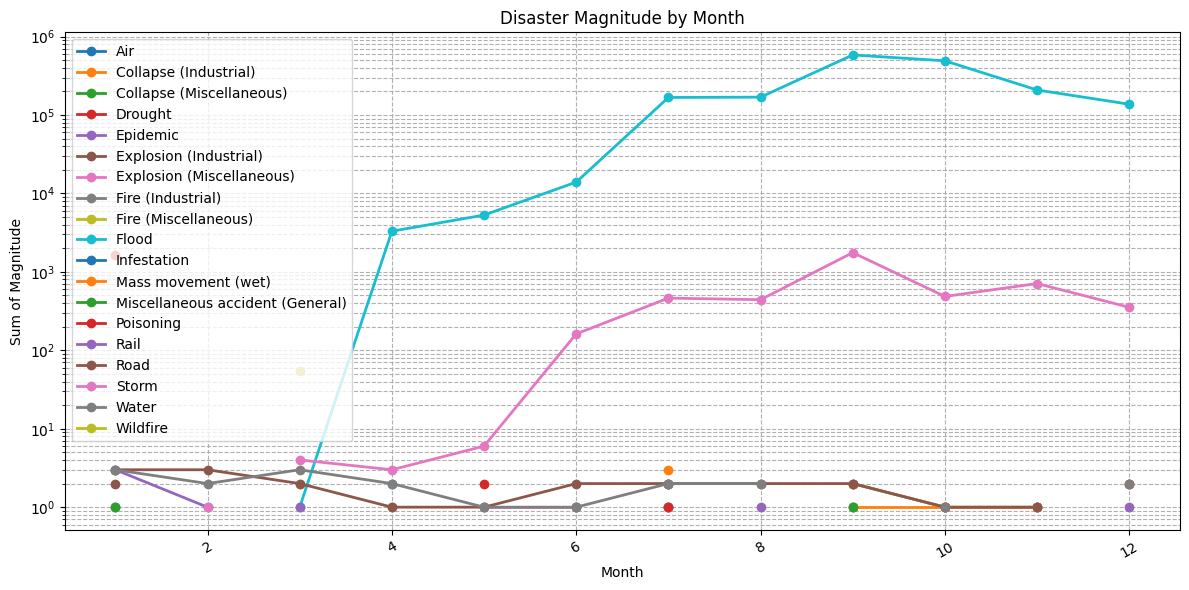

In [37]:
plt.figure(figsize=(12, 6))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col],marker="o",linewidth=2,label=col)

# Trục Y dạng log
plt.yscale("log")

plt.xlabel("Month")
plt.ylabel("Sum of Magnitude")
plt.title("Disaster Magnitude by Month")
plt.legend()
plt.xticks(rotation=30)
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()
